## **Título**: Lectura de video y extracción cuadros generando un archivo PNG por cada cuadro
---
<br />
<div class="alert alert-info" role="alert">
<p><strong>Lectura de video y extracción cuadros</strong></p>
<p><strong>Autor</strong>: Daniel Ivan Medina Barreras </p>
<p><strong>Fecha</strong>: 20200730</p>
<p></p>
<p><strong>Referencia</strong>: gg20200323_1500_VideoSacaCuadros_GeneraArchivoPNGXCuadro.ipynb</p>
<p> <strong>Descripción</strong> : Se realiza la lectura de un video se extraen los cuadros por segundo. 
Enseguida se genera un archivo PNG por cuadro y se almacenan en un directorio</p>



</div>

In [1]:
%%bash

pwd

/home/saxsa/Documentos/face_pro_2/Proyecto


### **datetime**
---

**Instalación**

>``conda install -c trentonoliphant -y datetime``

**Descripción**

La salida del formato es: año (año), mes (mes), día (día), hora (hora), minutos (minuto), segundos (segundo), y microsegundos (microsegundo).

Para formatear la salida del objeto fecha se cuenta con el atributo strftime, el cual permite mostrar la fecha en diversos formatos.

**%A** Dia de la semana en texto completo (Día de la semana, versión completa)

**%B** Mes del año en texto completo (Nombre del mes, versión completa)

**%F** Microsegundo como un número decimal, rellenado con ceros a la izquierda.

In [2]:
import datetime as dt

### **numpy**
---

**Instalación**

>``conda install -c anaconda -y numpy``

**Descripción**

Numpy es una biblioteca para el lenguaje de programación Python que (entre otras cosas) brinda soporte para grandes matrices multidimensionales.

¿Por qué es eso importante? Usando NumPy, podemos expresar imágenes como matrices multidimensionales.

Representar imágenes como matrices NumPy no solo es computacional y eficiente en el uso de recursos, sino que muchas otras bibliotecas de procesamiento de imágenes y aprendizaje automático también usan representaciones de matrices NumPy. Además, al usar las funciones matemáticas de alto nivel incorporadas de NumPy, podemos realizar rápidamente análisis numéricos en una imagen.

**Link**

[Numpy](https://numpy.org/)

In [3]:
import numpy as np

### **Matplotlib** 
---

**Instalación**

>``conda install -c conda-forge -y matplotlib``

**Descripción**

Matplotlib es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arreglos en el lenguaje de programación Python y su extensión matemática NumPy. 

Por medio del comando mágico **%matplotlib inline** se indica que los despliegues gráficos de la biblioteca matplotlib se despliegan en el cuaderno Jupyter directamente.

**Link**

[Matplotlib](https://matplotlib.org/)


In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

### **cv2, OpenCV**
---

**Instalación**

>``pip install opencv-python``

**Descripción**

OpenCV (Open Source Computer Vision Library) es una biblioteca de software de visión artificial y aprendizaje automático de código abierto. OpenCV se creó para proporcionar una infraestructura común para aplicaciones de visión por computadora y para acelerar el uso de la percepción de máquinas en los productos comerciales. 

La biblioteca tiene más de 2500 algoritmos optimizados, que incluyen un conjunto integral de algoritmos de visión por computadora y aprendizaje automático tanto clásicos como de última generación. Estos algoritmos se pueden usar para detectar y reconocer caras, identificar objetos, clasificar acciones humanas en videos, rastrear movimientos de cámara, rastrear objetos en movimiento, extraer modelos 3D de objetos, producir nubes de puntos 3D desde cámaras estéreo, unir imágenes para producir una alta resolución imagen de una escena completa, encuentre imágenes similares de una base de datos de imágenes, elimine los ojos rojos de las imágenes tomadas con flash, siga los movimientos de los ojos, reconozca los paisajes y establezca marcadores para superponerlos con realidad aumentada, etc.

**Link**

[Open CV](https://opencv.org/about/)

In [6]:
import cv2

### Librerías estándar de Python
---
**Descripción**

La instalación básica de Python viene con una muy completa librería de módulos para todo tipo de tareas, incluyendo acceso a ficheros y directorios, compresión de ficheros, ejecución recurrente (multihilo), email, html, xml, csv y un largo etcétera.

**Link**

[La biblioteca estándar de Python](https://docs.python.org/3/library/index.html)


In [7]:
import os
from os import path

### shutil
---
**Instalación**

>``pip install pytest-shutil``

**Descripción**

Esta biblioteca es un paquete de herramientas de gestión de entorno y shell de Unix para pruebas automatizadas.

**rmtree**

Elimina un árbol de directorios completo; la ruta debe apuntar a un directorio (pero no a un enlace simbólico a un directorio). Si ignore_errors es verdadero, los errores resultantes de eliminaciones fallidas serán ignorados; si es falso u omitido, dichos errores se manejan llamando a un controlador especificado por onerror o, si se omite, generan una excepción.

**Link**

[shutil](https://docs.python.org/3/library/shutil.html)

In [8]:
from shutil import rmtree

## Inicio
---

### Creacion de extenciones del programa

- Se asigna el nombre de la carpeta donde sie guardaran los cuadros del video 
- Se asigna el nombre con el que se guardara el cuadro
- Se asigna la extencion del cuadro, en este caso se guardara en formato png
- Se asigna la ruta del video con el que se va a trabajar

In [9]:
ggDirectorioDestino = './ggDepositoImagenes'
BaseNombreArchivosCuadros = ggDirectorioDestino + '/Cuadro_'
ExtensionArchivosCuadros = '.png'
MiURLVideo = './Video.mp4'

se crea una lista vacia  

In [10]:
ggMensajeSalida = []

Con el metodo **append** agregamos un mensaje al final de la lista vacia

In [11]:
ggMensajeSalida.append('MensajeSalida_0: La fecha actual es: ')

Con **datetime.now()** mostramos la fecha actual  
Se asigna el formato con que se mostrara la fecha y la hora  
Se imprime el **ggMensajeSalida** con la fecha y hora actual   

In [12]:
FechaHoy = dt.datetime.now()
FechaAAAAMMDDHHMMSSss = FechaHoy.strftime("%Y%m%d%H%M%S%f")
print (ggMensajeSalida[0] + str(FechaHoy) )

MensajeSalida_0: La fecha actual es: 2020-07-30 21:16:15.156561


In [13]:
ggError = []

In [14]:
ggError.append('Error_0: Imposible abrir archvo de video ')

Archivo de Video por analizar

### Generación estructura Python con el video

In [15]:
MiVideo = cv2.VideoCapture(MiURLVideo)
if not MiVideo.isOpened(): 
       print ( ggError[0] + MiURLVideo)

### Obtención de los cuadros (frames)  del video

In [16]:
ConjuntoCuadrosVideo = []
while(MiVideo.isOpened()):
    ret, frame = MiVideo.read()
    if ret == False:
        break
    ConjuntoCuadrosVideo.append(frame)

In [17]:
NumCuadrosEnVideo = len(ConjuntoCuadrosVideo)
NumCuadrosEnVideo

231

### Conversión de formato gráfico de cada cuadro a formato color RGB 

In [18]:
%%time

ConjuntoCuadrosEnColorRGB = []

for key in range(0, NumCuadrosEnVideo):
    MiMarcoEnRGB = cv2.cvtColor(ConjuntoCuadrosVideo[key], cv2.COLOR_BGR2RGB)
    ConjuntoCuadrosEnColorRGB.append(MiMarcoEnRGB)

CPU times: user 231 ms, sys: 142 ms, total: 373 ms
Wall time: 105 ms


### Obtención número de marcos por segundo (fps=frames per second)

In [19]:
NumTotalCuadrosEnVideo = len(ConjuntoCuadrosEnColorRGB)
print("Número de cuadros en el Video =", NumTotalCuadrosEnVideo )

Número de cuadros en el Video = 231


In [20]:
fps = MiVideo.get(cv2.CAP_PROP_FPS)
fps

19.619241389332945

In [21]:
NumTotalSegundosEnVideo = NumTotalCuadrosEnVideo / fps
print("Cáculo Número de segundos en el Video =", NumTotalSegundosEnVideo )


Cáculo Número de segundos en el Video = 11.774155555555556


### Rotación de los cuadros del video
---

In [22]:
%%time 

ConjuntoCuadrosVideoEnColorRGBRotados90Grados = []

for key in range(0, NumTotalCuadrosEnVideo):
    frameRotate = cv2.rotate(ConjuntoCuadrosEnColorRGB[key], cv2.ROTATE_90_COUNTERCLOCKWISE)
    ConjuntoCuadrosVideoEnColorRGBRotados90Grados.append(frameRotate)

CPU times: user 194 ms, sys: 80.7 ms, total: 275 ms
Wall time: 275 ms


In [23]:
NumCuadrosEnVideoRGBRotados90 = len(ConjuntoCuadrosVideoEnColorRGBRotados90Grados)
NumCuadrosEnVideoRGBRotados90

231

### Ver imagen original y rotada
---

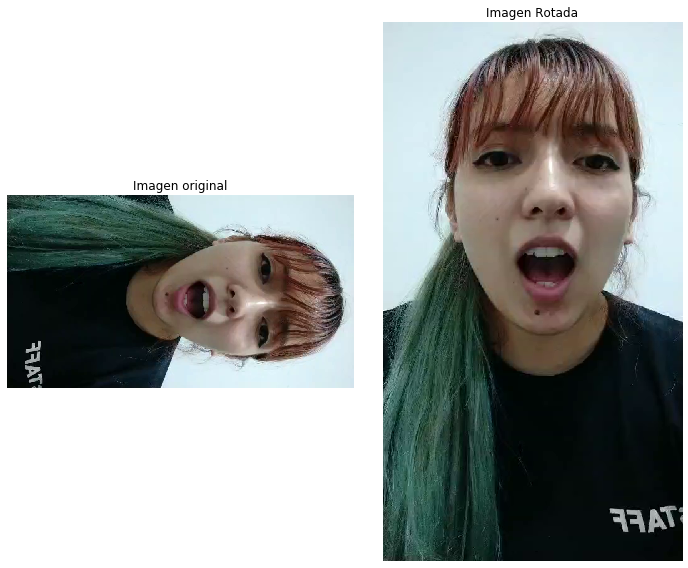

In [24]:
plt.figure(figsize=(10,8))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(ConjuntoCuadrosEnColorRGB[0], cmap='gray') 
plt.axis('off')
plt.title('Imagen original')



#Bordes
plt.subplot(1, 2, 2)
plt.imshow(ConjuntoCuadrosVideoEnColorRGBRotados90Grados[0], cmap='gray')
plt.axis('off')
plt.title('Imagen Rotada');
plt.tight_layout()

### Crear carpetas
---

No es recomendable borrar tus datos, pero en este caso se borran las imágenes para no tener cruce entre el análisis de un video y otro  
Si existe la carpeta la borramos

In [31]:
if path.exists(ggDirectorioDestino):
    rmtree(ggDirectorioDestino)

Si no existe la carpeta la crea 

In [32]:
try:
    os.stat(ggDirectorioDestino)
except:
    os.mkdir(ggDirectorioDestino)

In [27]:
%%bash

pwd

ls -ltr ./ggDepositoImagenes

/home/saxsa/Documentos/face_pro_2/Proyecto
total 0


### Almacenamiento de cada cuadro en un archivo gráfico 
---

In [28]:
%%time

for key in range(0, NumCuadrosEnVideoRGBRotados90):
    cv2.imwrite( BaseNombreArchivosCuadros + str(key) + ExtensionArchivosCuadros ,ConjuntoCuadrosVideoEnColorRGBRotados90Grados[key])

CPU times: user 6.35 s, sys: 183 ms, total: 6.53 s
Wall time: 6.57 s


In [29]:
%%bash

pwd

echo 'Total de archivos de los cuadros del video'

ls  ./ggDepositoImagenes/ | wc -l 

/home/saxsa/Documentos/face_pro_2/Proyecto
Total de archivos de los cuadros del video
231


In [30]:
%%bash

pwd

ls -ltr ./ggDepositoImagenes/

/home/saxsa/Documentos/face_pro_2/Proyecto
total 127808
-rw-rw-r--. 1 saxsa saxsa 529025 jul 30 21:16 Cuadro_0.png
-rw-rw-r--. 1 saxsa saxsa 528132 jul 30 21:16 Cuadro_1.png
-rw-rw-r--. 1 saxsa saxsa 521115 jul 30 21:16 Cuadro_2.png
-rw-rw-r--. 1 saxsa saxsa 523618 jul 30 21:16 Cuadro_3.png
-rw-rw-r--. 1 saxsa saxsa 527239 jul 30 21:16 Cuadro_4.png
-rw-rw-r--. 1 saxsa saxsa 524846 jul 30 21:16 Cuadro_5.png
-rw-rw-r--. 1 saxsa saxsa 534249 jul 30 21:16 Cuadro_6.png
-rw-rw-r--. 1 saxsa saxsa 536800 jul 30 21:16 Cuadro_7.png
-rw-rw-r--. 1 saxsa saxsa 535879 jul 30 21:16 Cuadro_8.png
-rw-rw-r--. 1 saxsa saxsa 546325 jul 30 21:16 Cuadro_9.png
-rw-rw-r--. 1 saxsa saxsa 545796 jul 30 21:16 Cuadro_10.png
-rw-rw-r--. 1 saxsa saxsa 551073 jul 30 21:16 Cuadro_11.png
-rw-rw-r--. 1 saxsa saxsa 558644 jul 30 21:16 Cuadro_12.png
-rw-rw-r--. 1 saxsa saxsa 562730 jul 30 21:16 Cuadro_13.png
-rw-rw-r--. 1 saxsa saxsa 566668 jul 30 21:16 Cuadro_14.png
-rw-rw-r--. 1 saxsa saxsa 571017 jul 30 21:16 Cuadro_1